In [2]:
from dl1_data_handler.reader import DLWaveformReader, DLDataReader, TableQualityQuery, DLRawTriggerReader
import matplotlib.pyplot as plt
import numpy as np
from ctapipe.io import EventSource
from ctapipe.visualization import CameraDisplay
from ctapipe.core.traits import List
from ctapipe.core import QualityQuery

from pathlib import Path

# Por defecto saca la r0 de la cámara completa

In [3]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/reduced/NSB/corsika_run4.dl1b.h5",
                                           "/gamma3/users/jbuces/software/mc_data/reduced/NSB/corsika_run5.dl1b.h5"],
                          image_mapper_type  = "ShiftingMapper",
                          mode = "mono",
                          sequence_position= "maximum",
                          sequence_length = 6,
                          allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                          #output_settings= "waveform",
                          allowed_tels = [1],
                          quality_cuts = False)

In [3]:
description = reader.example_identifiers
for pos, desc in enumerate(description):
     print(f"{pos}:{desc}")
     break

0:index file_index table_index obs_id tel_type_id event_id tel_id    true_energy         true_alt          true_az       true_shower_primary_id spherical_offset_az spherical_offset_alt angular_separation  log_true_energy   true_shower_primary_class
                                                                       TeV               deg               deg                                        deg                 deg                 deg                TeV                                  
----- ---------- ----------- ------ ----------- -------- ------ ----------------- ----------------- ------------------ ---------------------- ------------------- -------------------- ------------------ ------------------ -------------------------
    0          0           0      4           0      100      1 5.560657024383545 62.91127418072167 163.72799455674974                    101  -7.372532050692125   -6.100065092115785  9.558204415118668 0.7451261090651803                         1


In [4]:
reader._get_n_events()

20000

In [5]:
reader.generate_mono_batch(batch_indices=[0,1,2,3,4,5,6,7,8])

index,file_index,table_index,obs_id,tel_type_id,event_id,tel_id,features,cherenkov_pe,true_energy,true_alt,true_az,true_shower_primary_id,spherical_offset_az,spherical_offset_alt,angular_separation,log_true_energy,true_shower_primary_class
,,,,,,,,,TeV,deg,deg,,deg,deg,deg,TeV,
int64,int64,int64,int32,int64,int64,int64,"float32[117,117,6]",int64,float64,float64,float64,int64,float64,float64,float64,float64,int64
0,0,0,4,0,100,1,0.0 .. 0.0,0,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
1,0,1,4,0,101,1,0.0 .. 0.0,183,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
2,0,2,4,0,102,1,0.0 .. 0.0,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
3,0,3,4,0,103,1,0.0 .. 0.0,12,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
4,0,4,4,0,104,1,0.0 .. 0.0,0,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
5,0,5,4,0,105,1,0.0 .. 0.0,67,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
6,0,6,4,0,106,1,0.0 .. 0.0,0,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
7,0,7,4,0,107,1,0.0 .. 0.0,0,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1


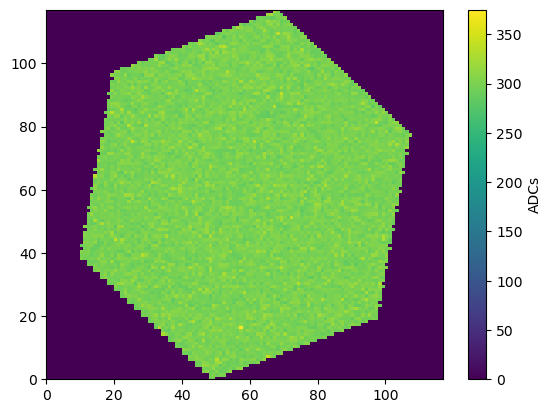

In [6]:
waveform = reader.generate_mono_batch(batch_indices=[0,1,2,3,4,5])['features'][1]
plt.figure()
plt.pcolor(waveform[:,:,5],cmap='viridis')
plt.colorbar(label="ADCs")
plt.show()
plt.close()

# One random patch (0.5 prob p.e. < nsb_threhold)

In [7]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/reduced/NSB/corsika_run4.dl1b.h5",
                                           "/gamma3/users/jbuces/software/mc_data/reduced/NSB/corsika_run5.dl1b.h5"],
                          image_mapper_type  = "ShiftingMapper",
                          mode = "mono",
                          sequence_position= "maximum",
                          output_settings = "random_patch",
                          number_of_trigger_patches = 7,
                          sequence_length = 75,
                          nsb_threshold = 0,
                          allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                          allowed_tels = [1],
                          quality_cuts = False)

In [8]:
reader.generate_mono_batch(batch_indices=[0,1,2,3,10500])


True
False
False
False
True


index,file_index,table_index,obs_id,tel_type_id,event_id,tel_id,features,cherenkov_pe,true_energy,true_alt,true_az,true_shower_primary_id,spherical_offset_az,spherical_offset_alt,angular_separation,log_true_energy,true_shower_primary_class
,,,,,,,,,TeV,deg,deg,,deg,deg,deg,TeV,
int64,int64,int64,int32,int64,int64,int64,"float32[28,28,75]",int64,float64,float64,float64,int64,float64,float64,float64,float64,int64
0,0,0,4,0,100,1,300.0 .. 295.0,0,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
1,0,1,4,0,101,1,291.0 .. 294.0,31,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
2,0,2,4,0,102,1,0.0 .. 294.0,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
3,0,3,4,0,103,1,305.0 .. 300.0,4,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
10500,1,500,5,0,5100,1,0.0 .. 310.0,0,0.018437640741467476,71.45189298306735,157.5896079270109,101,-6.973576387392849,2.7462501893036344,7.492354363988323,-1.7342946515314885,1


True
True
True
False
cherenkov_pe
------------
           0
           0
           0
           4


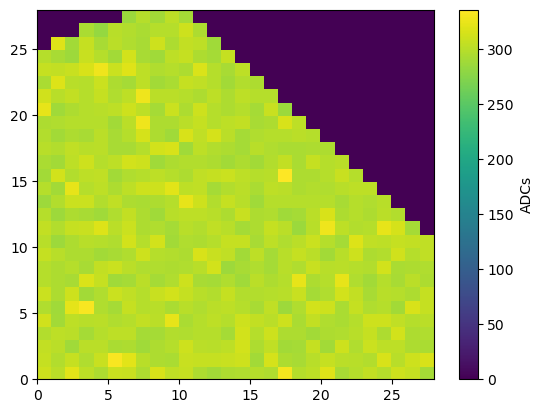

In [9]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/reduced/NSB/corsika_run4.dl1b.h5",
                                           "/gamma3/users/jbuces/software/mc_data/reduced/NSB/corsika_run5.dl1b.h5"],
                          image_mapper_type  = "ShiftingMapper",
                          mode = "mono",
                          sequence_position= "maximum",
                          output_settings = "random_patch",
                          number_of_trigger_patches = 7,
                          sequence_length = 75,
                          nsb_threshold = 0,
                          allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                          allowed_tels = [1],
                          quality_cuts = False)
batch = reader.generate_mono_batch(batch_indices=[0,1,2,3])
print(batch['cherenkov_pe'])
waveform = batch['features'][0]

plt.figure()
plt.pcolor(waveform[:,:,15],cmap='viridis')
plt.colorbar(label="ADCs")
plt.show()
plt.close()

# Taking the hot patch

In [10]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/reduced/NSB/corsika_run4.dl1b.h5",
                                           "/gamma3/users/jbuces/software/mc_data/reduced/NSB/corsika_run5.dl1b.h5"],
                          image_mapper_type  = "ShiftingMapper",
                          mode = "mono",
                          sequence_position= "maximum",
                          output_settings = "hot_patch",
                          hot_pixel_from_simulation = True,
                          number_of_trigger_patches = 7,
                          sequence_length = 75,
                          nsb_threshold = 0,
                          allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                          allowed_tels = [1],
                          quality_cuts = False)

In [11]:
reader.generate_mono_batch(batch_indices=[0,1,2,3,4])

index,file_index,table_index,obs_id,tel_type_id,event_id,tel_id,features,cherenkov_pe,true_energy,true_alt,true_az,true_shower_primary_id,spherical_offset_az,spherical_offset_alt,angular_separation,log_true_energy,true_shower_primary_class
,,,,,,,,,TeV,deg,deg,,deg,deg,deg,TeV,
int64,int64,int64,int32,int64,int64,int64,"float32[28,28,75]",int64,float64,float64,float64,int64,float64,float64,float64,float64,int64
0,0,0,4,0,100,1,0.0 .. 295.0,0,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
1,0,1,4,0,101,1,291.0 .. 294.0,31,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
2,0,2,4,0,102,1,0.0 .. 294.0,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
3,0,3,4,0,103,1,305.0 .. 300.0,4,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
4,0,4,4,0,104,1,0.0 .. 321.0,0,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1


In [12]:
waveform = reader.generate_mono_batch(batch_indices=[0,1,2,3,4,5])['features'][1]

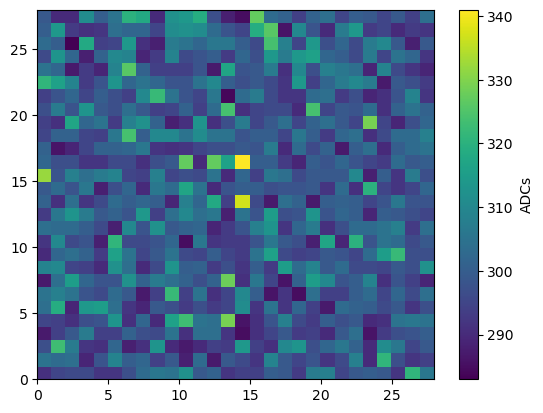

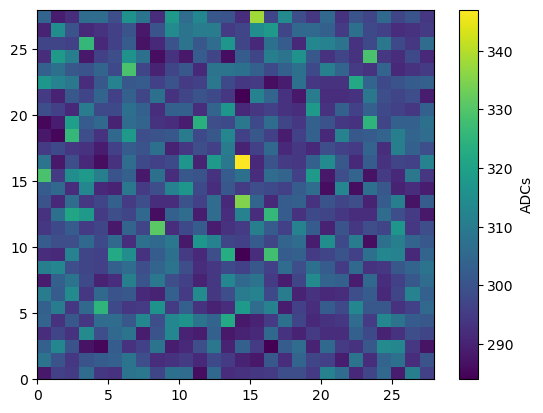

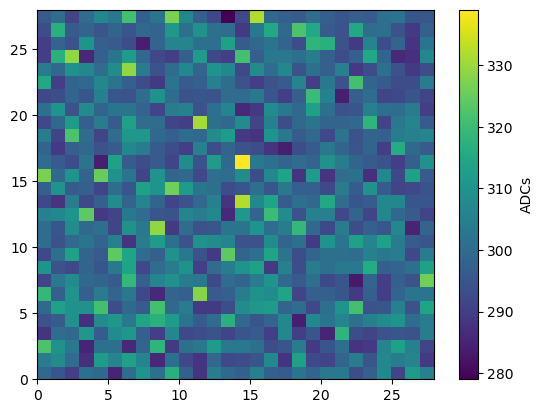

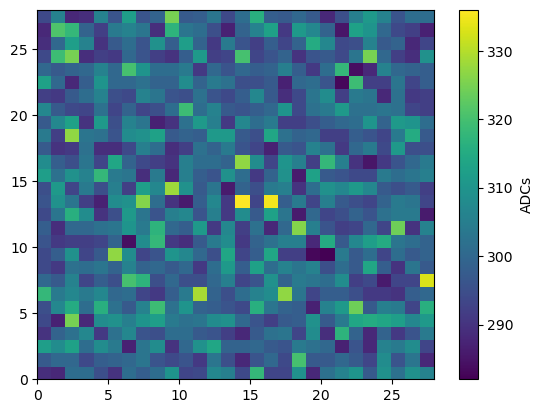

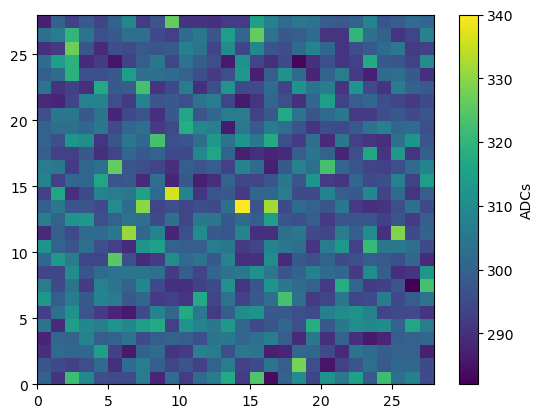

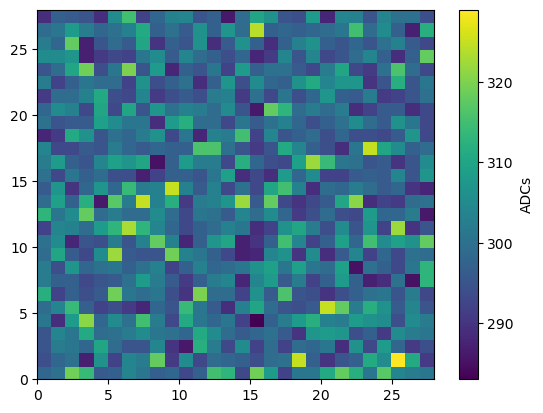

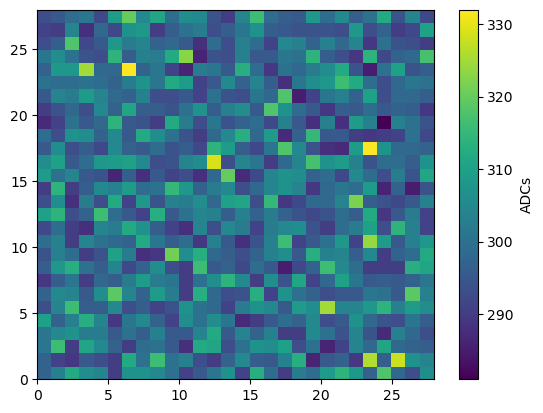

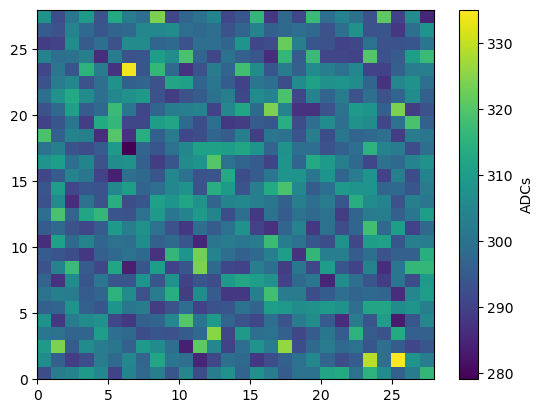

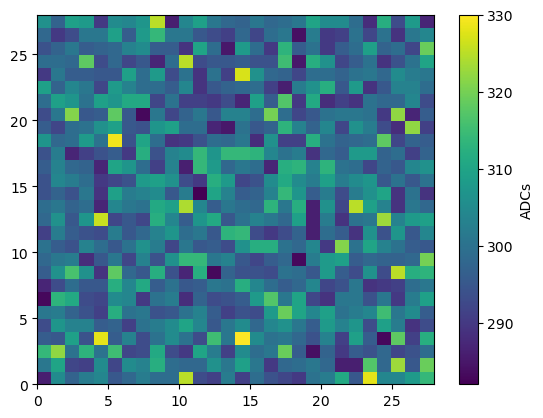

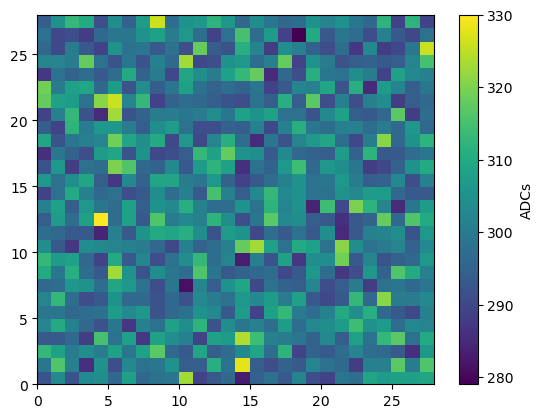

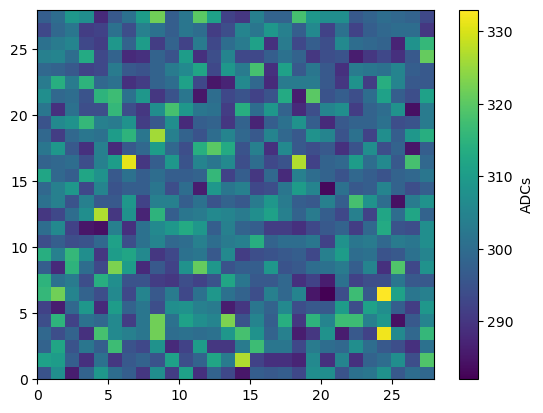

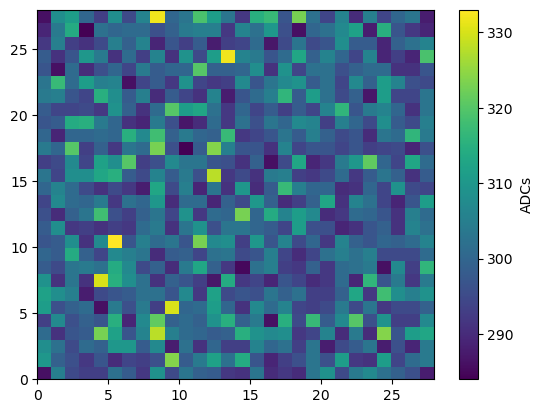

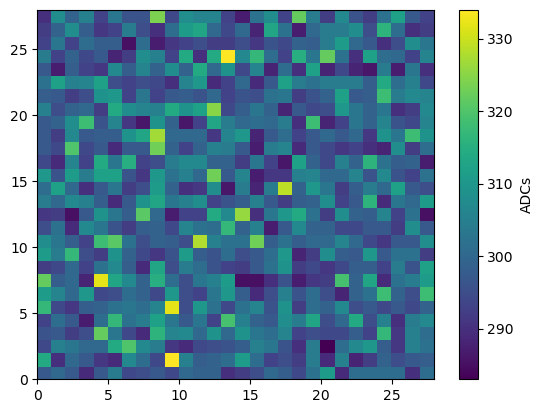

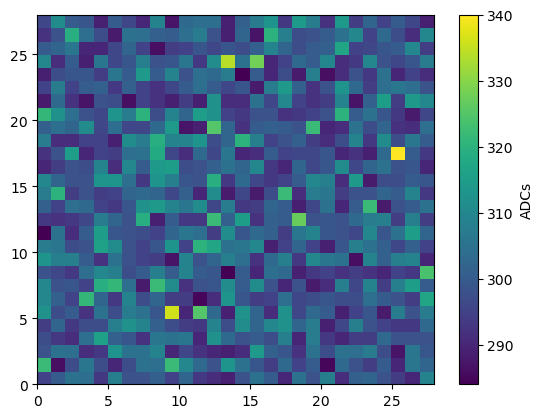

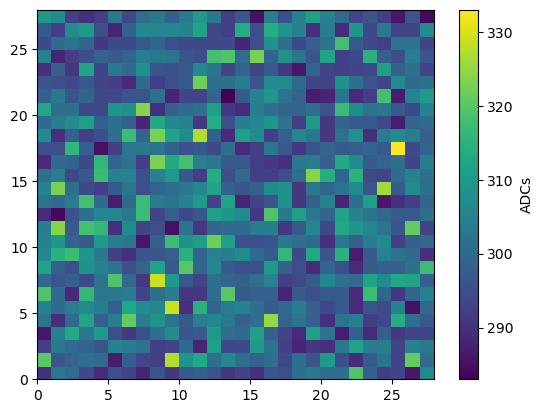

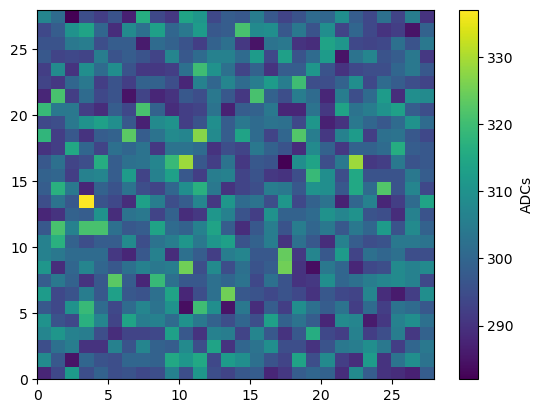

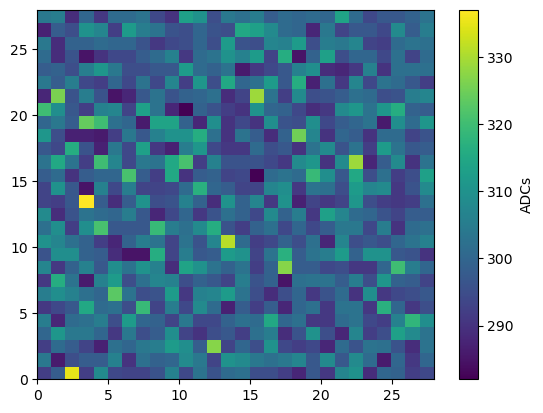

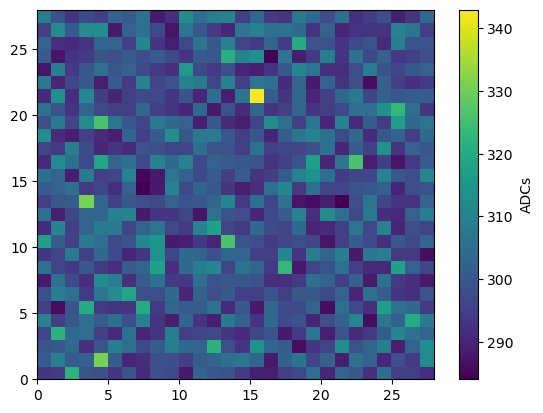

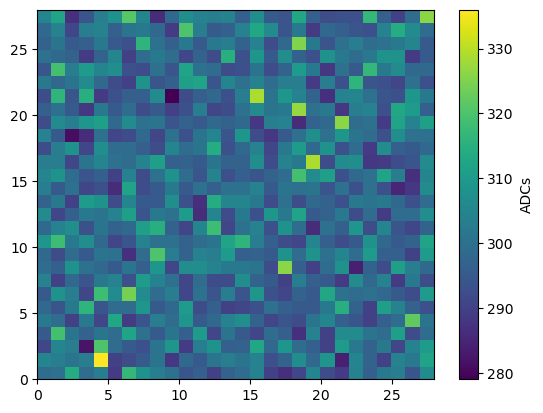

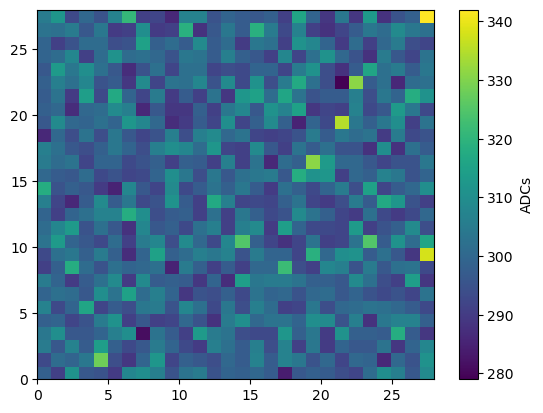

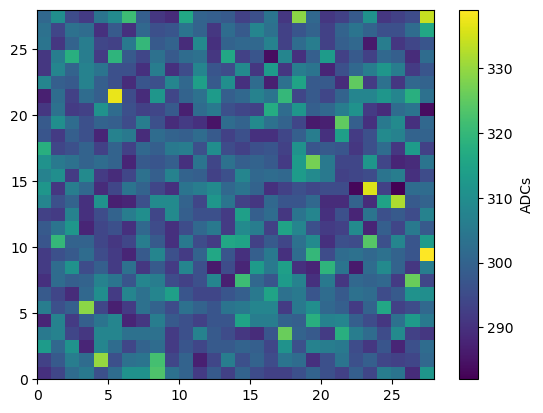

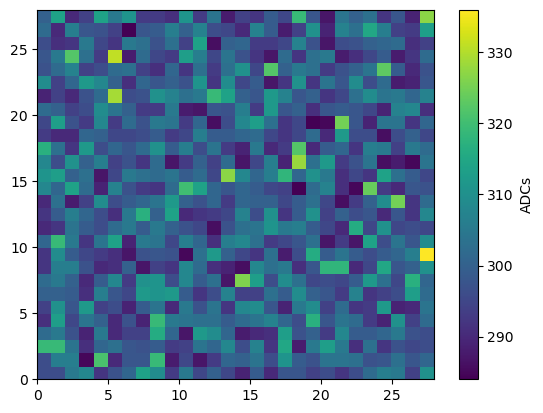

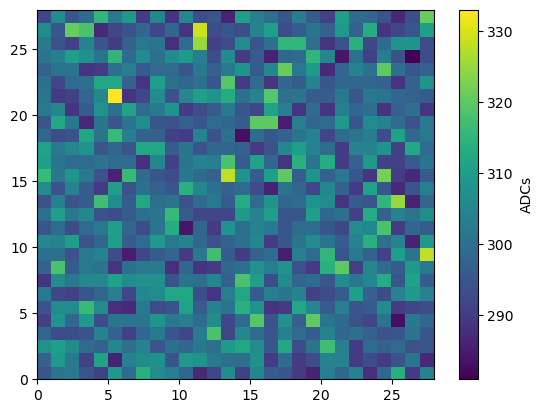

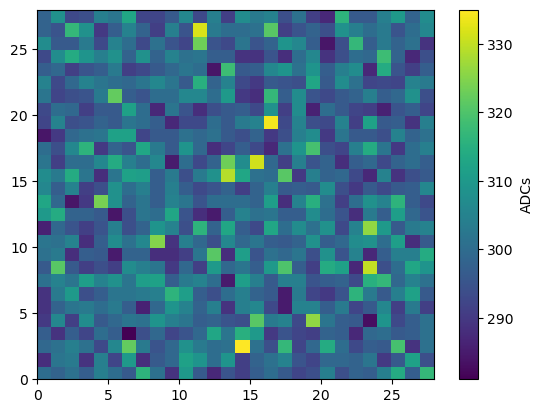

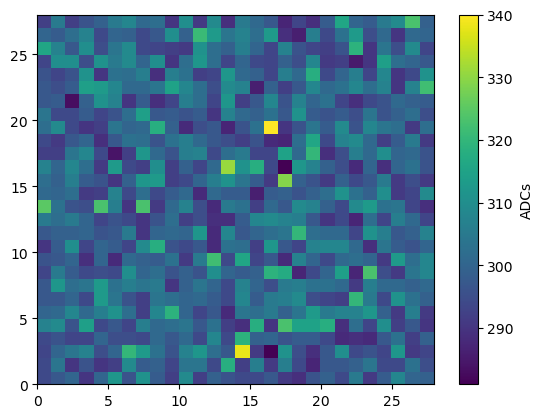

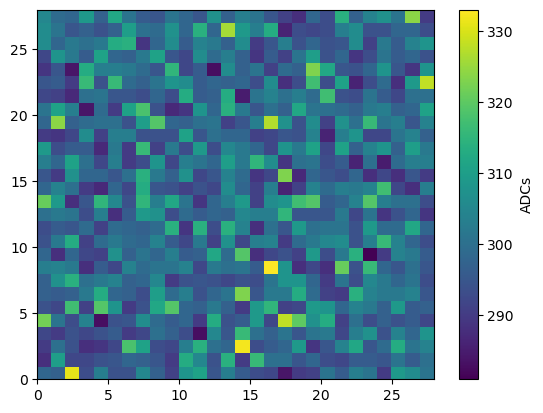

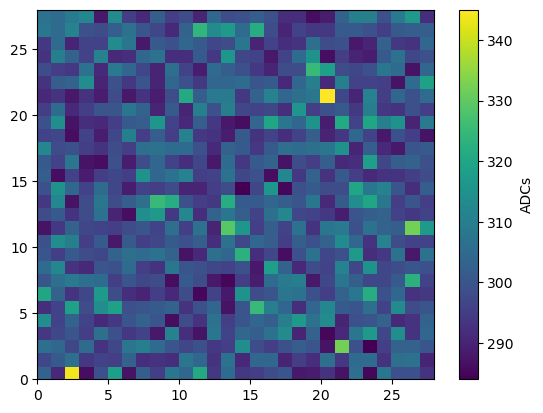

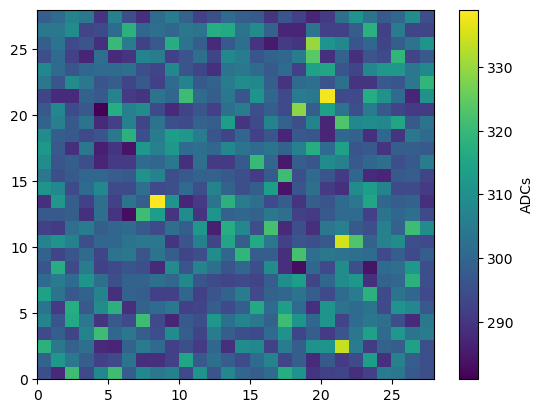

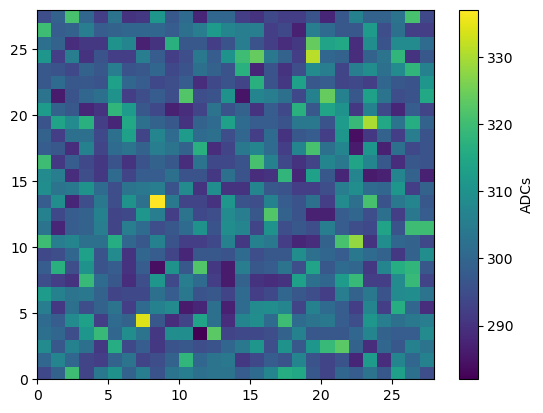

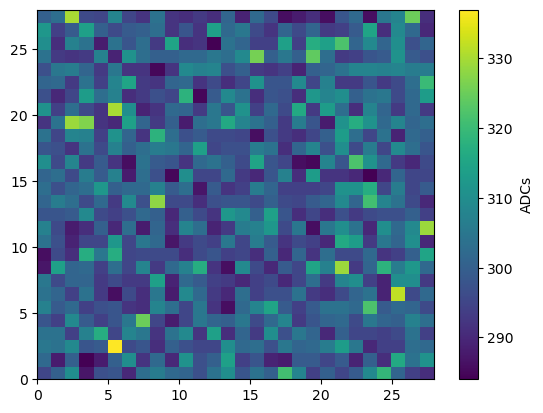

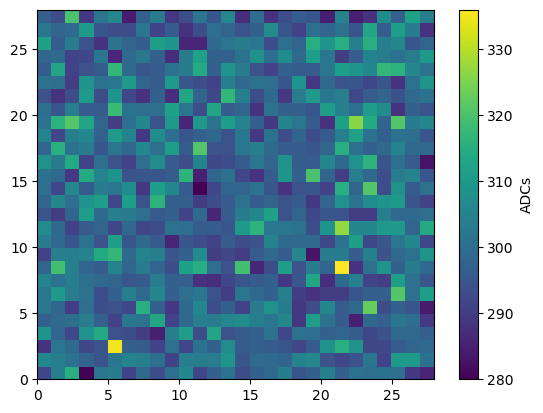

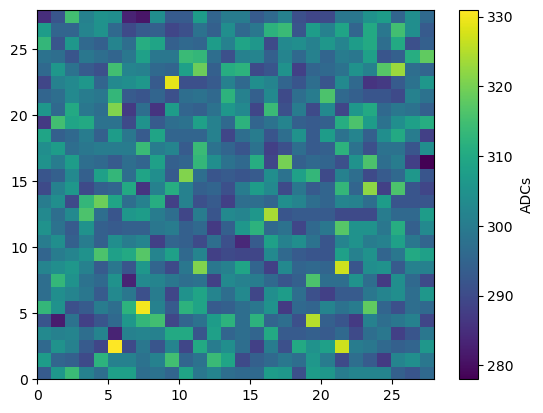

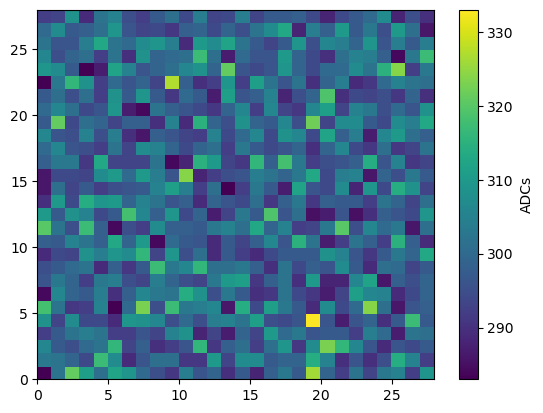

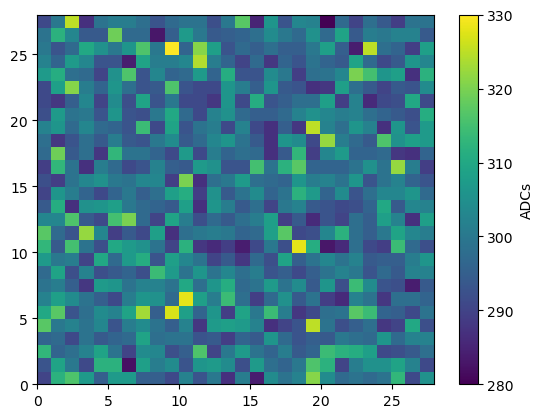

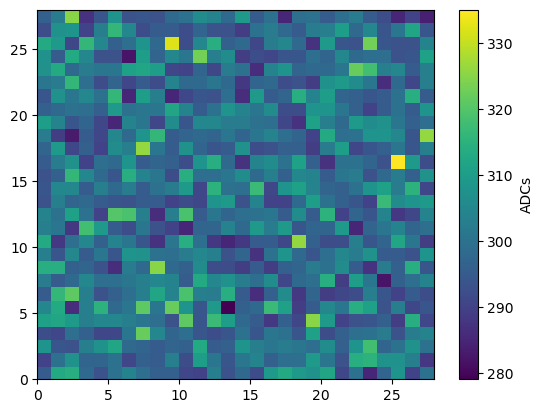

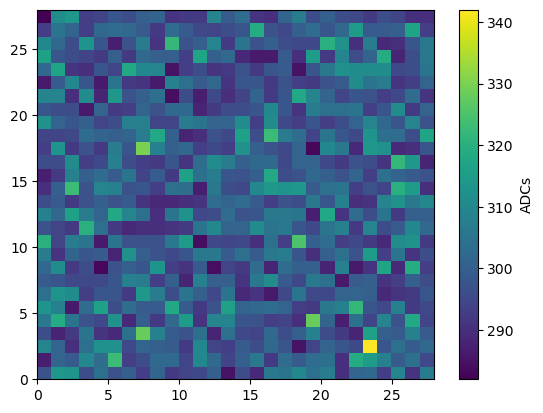

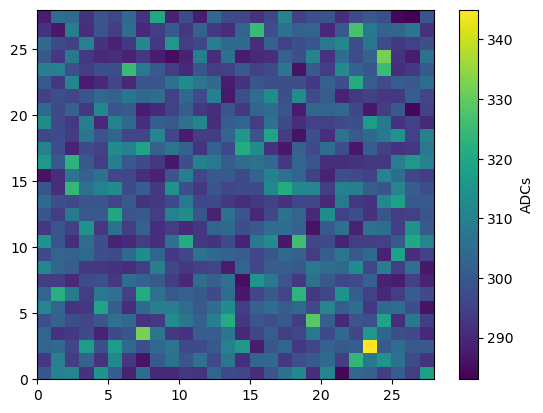

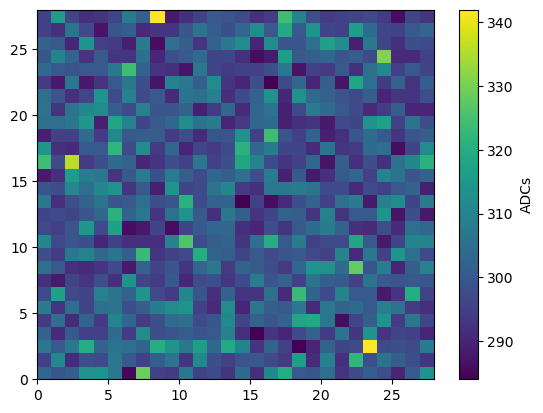

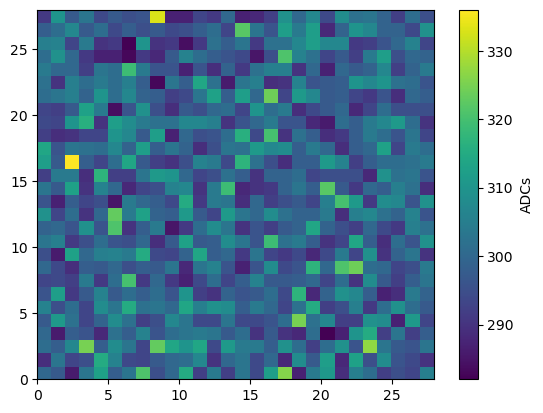

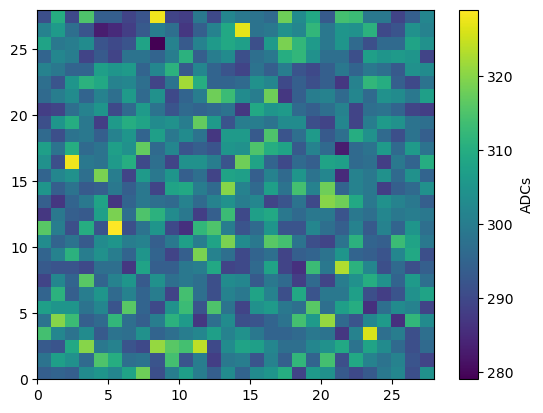

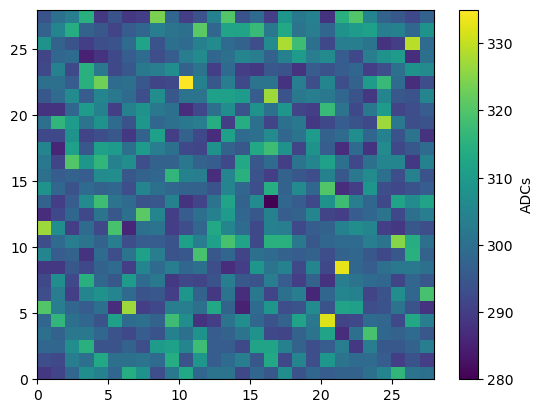

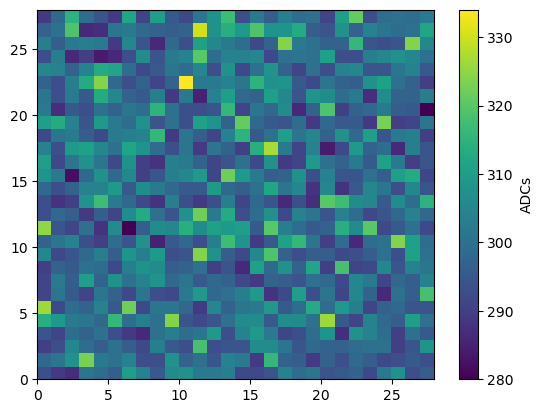

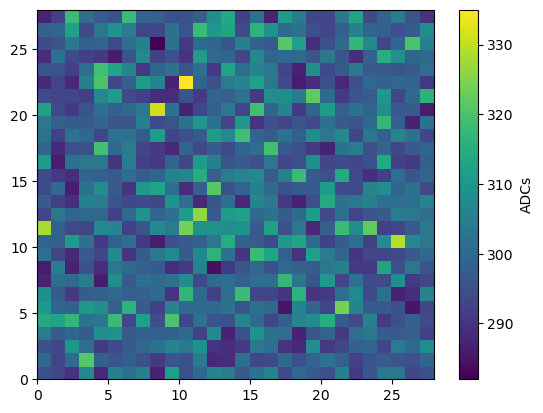

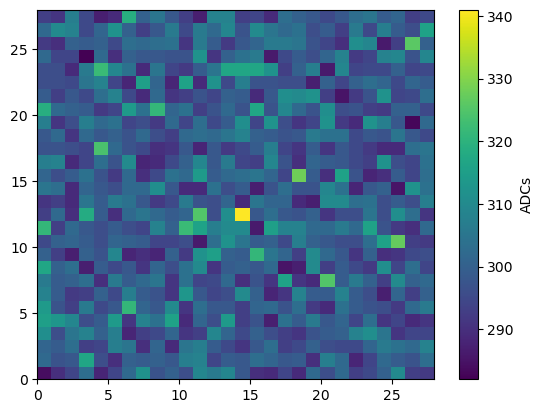

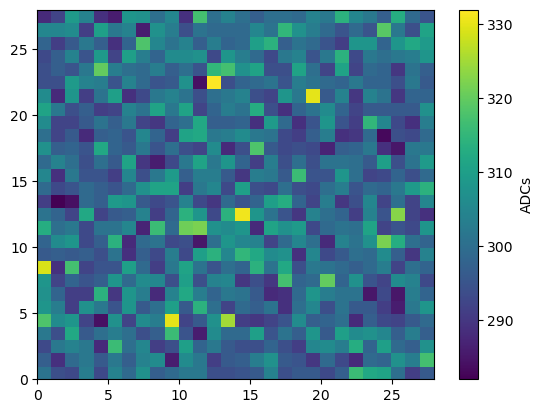

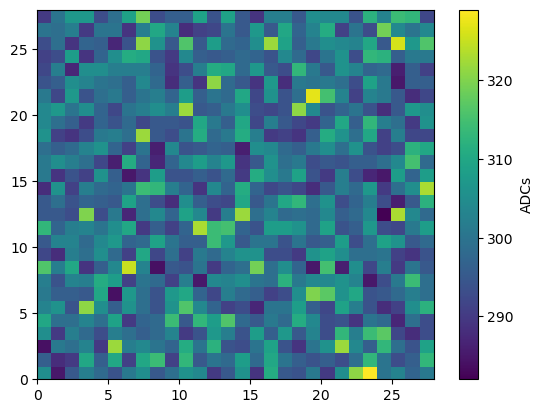

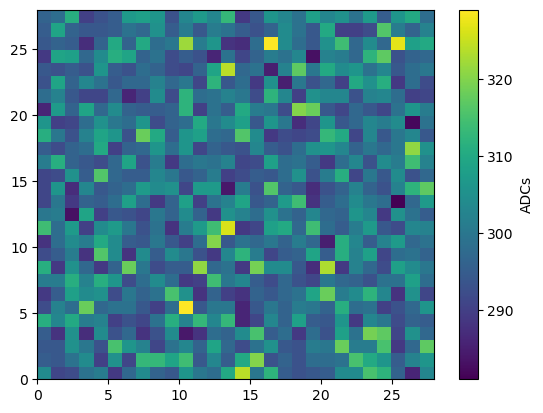

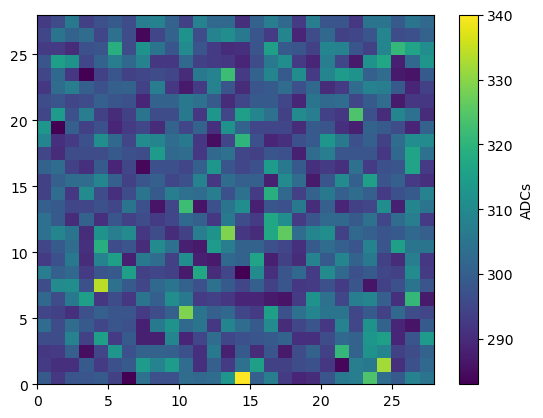

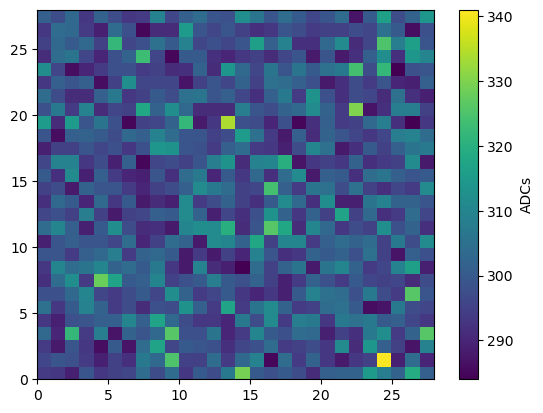

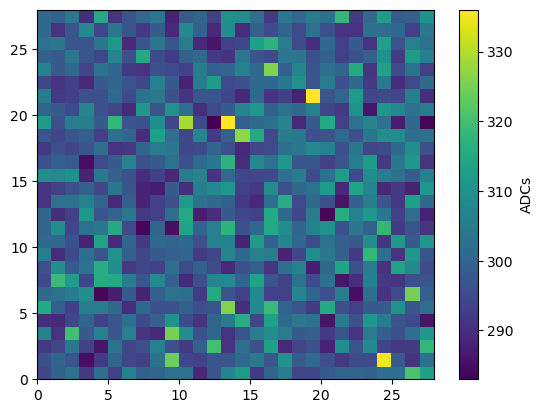

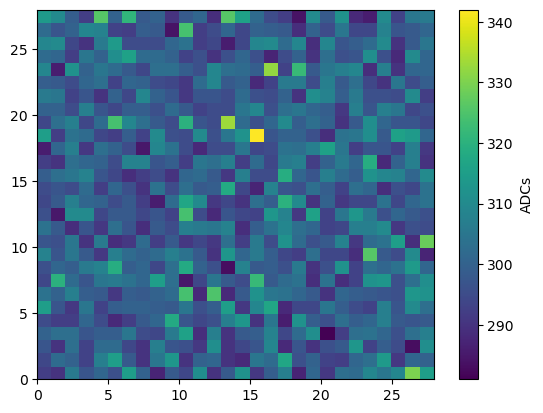

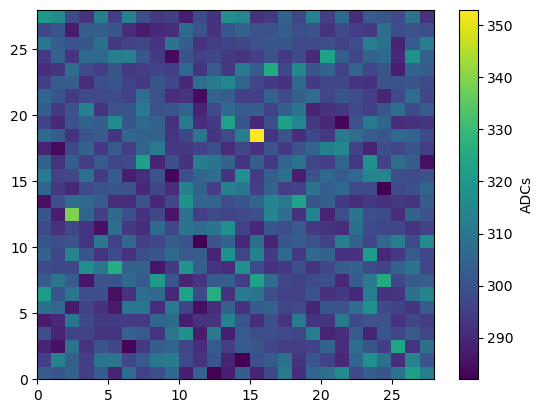

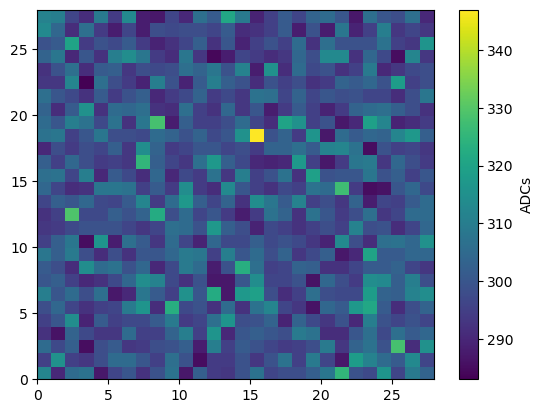

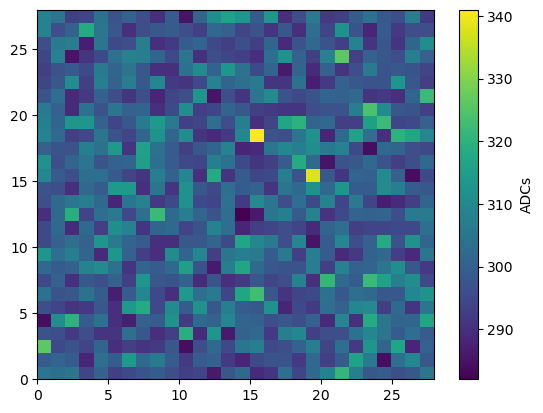

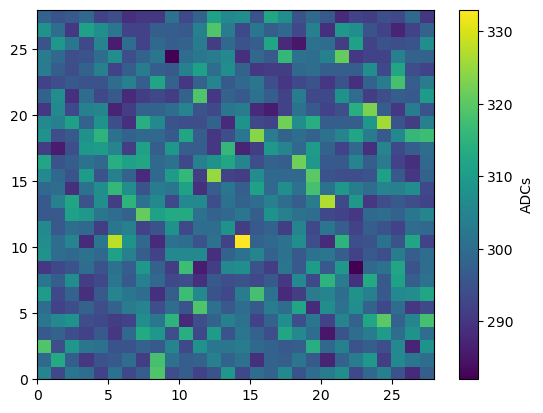

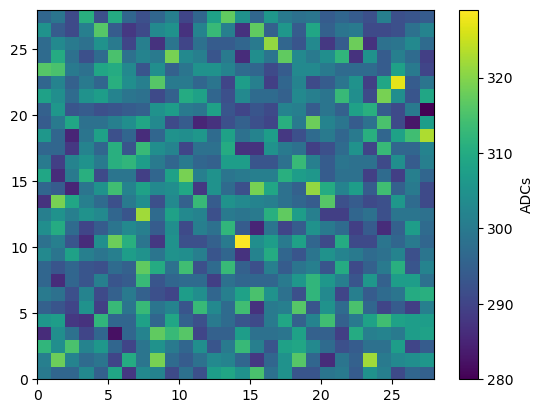

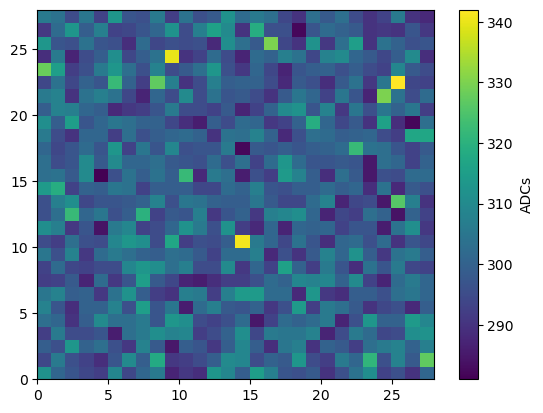

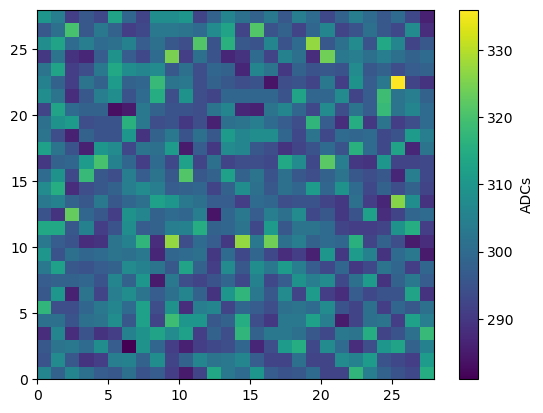

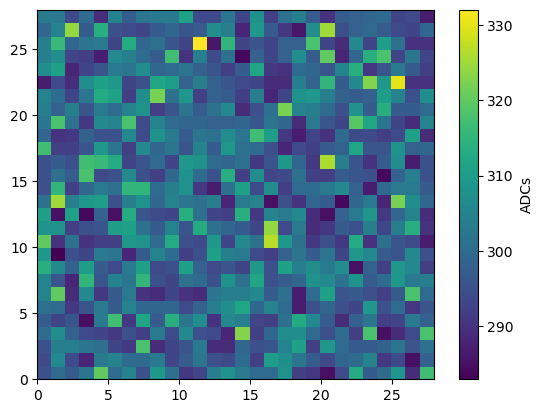

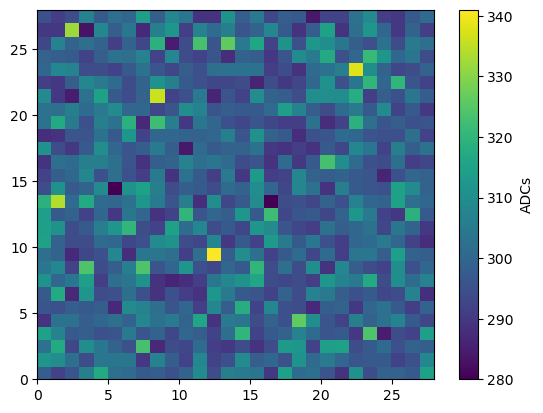

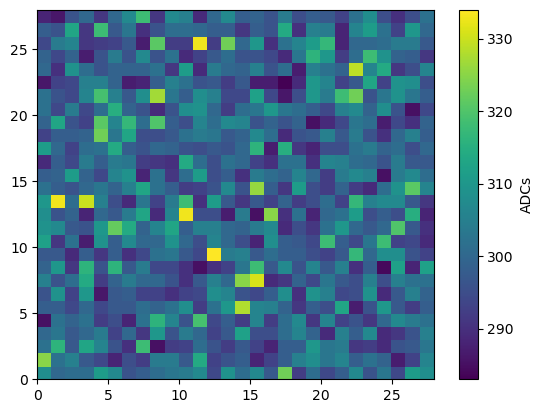

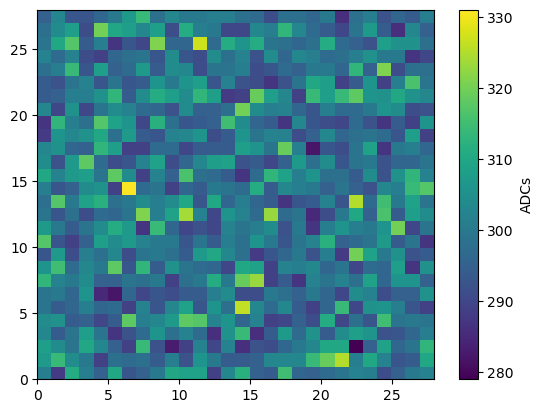

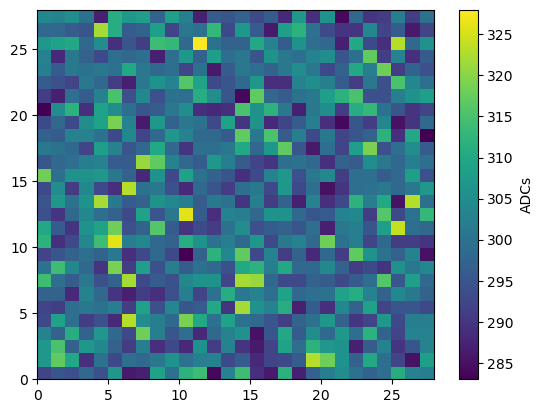

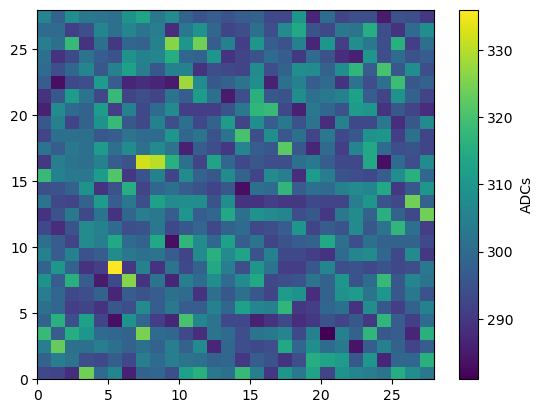

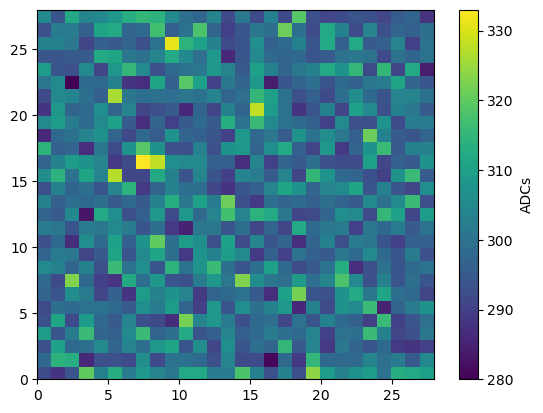

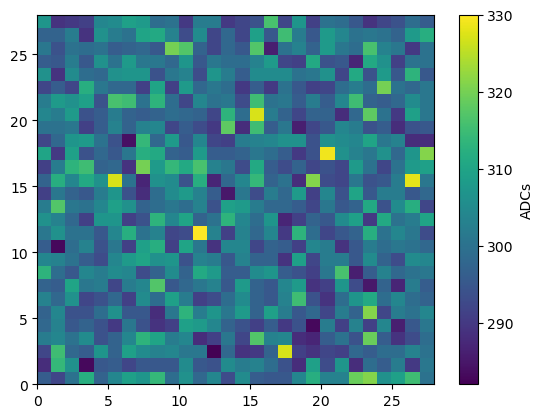

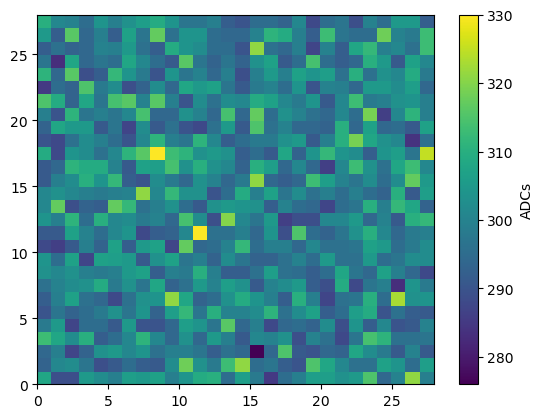

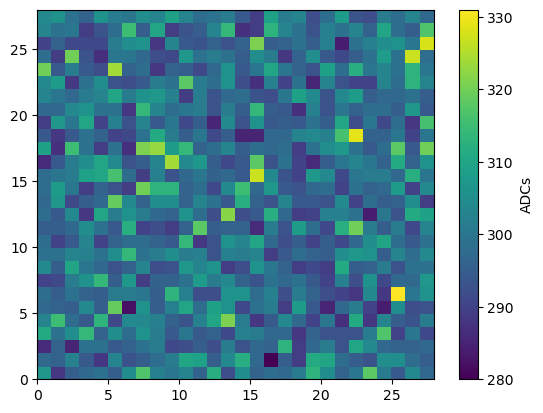

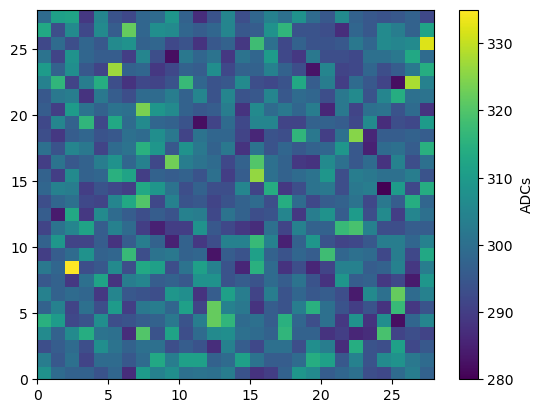

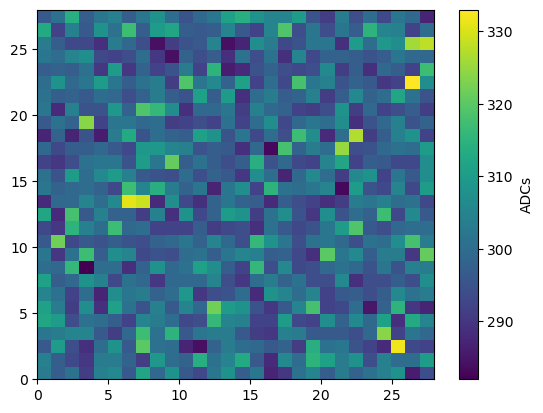

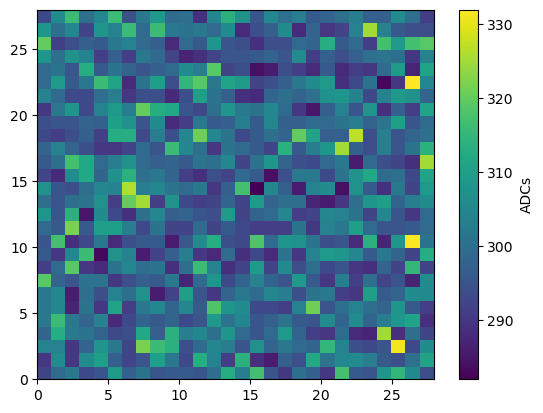

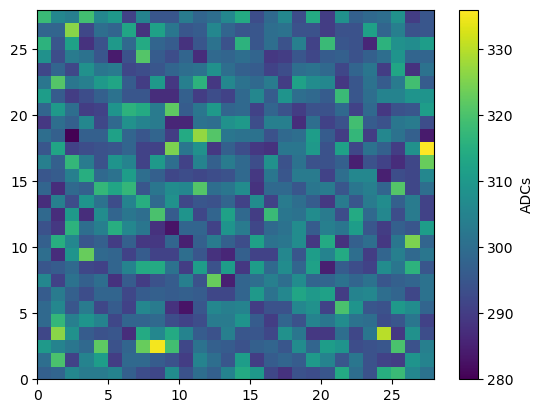

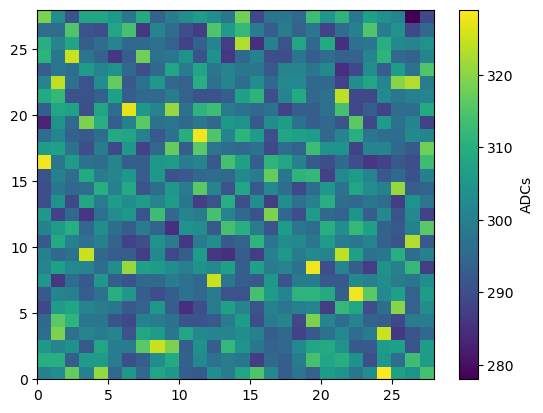

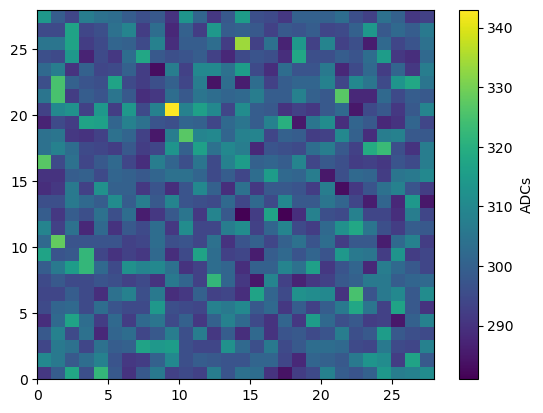

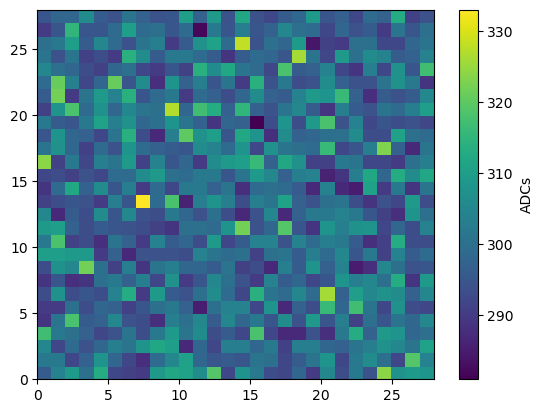

In [13]:
for i in range (0,75):
    plt.figure()
    plt.pcolor(waveform[:,:,i],cmap='viridis')
    plt.colorbar(label="ADCs")
    plt.show()
    plt.close()

In [14]:
reader.trigger_settings["trigger_patches"][0]

{'x': np.int64(14), 'y': np.int64(14)}

# try balanced patches

In [15]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/reduced/NSB/corsika_run4.dl1b.h5",
                                           "/gamma3/users/jbuces/software/mc_data/reduced/NSB/corsika_run5.dl1b.h5"],
                              image_mapper_type  = "ShiftingMapper",
                              mode = "mono",
                              sequence_position= "maximum",
                              output_settings = "all_patches",
                              hot_pixel_from_simulation = False,
                              number_of_trigger_patches = 7,
                              sequence_length = 10,
                              nsb_threshold = 0,
                              allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                              allowed_tels = [1],
                              quality_cuts = False)

In [16]:
reader.generate_mono_batch(batch_indices=[0,1,2,3,4, 5, 6, 7, 8])

index,file_index,table_index,obs_id,tel_type_id,event_id,tel_id,true_energy,true_alt,true_az,true_shower_primary_id,spherical_offset_az,spherical_offset_alt,angular_separation,log_true_energy,true_shower_primary_class,patch_index,patch_waveform,cherenkov_pe
,,,,,,,TeV,deg,deg,,deg,deg,deg,TeV,,,,
int64,int64,int64,int32,int64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,"float32[28,28,10]",int64
1,0,1,4,0,101,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1,15,0.0 .. 303.0,59
1,0,1,4,0,101,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1,16,306.0 .. 292.0,53
1,0,1,4,0,101,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1,3,0.0 .. 288.0,0
1,0,1,4,0,101,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1,13,0.0 .. 0.0,0
1,0,1,4,0,101,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1,20,291.0 .. 0.0,0
1,0,1,4,0,101,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1,28,0.0 .. 291.0,0
1,0,1,4,0,101,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1,35,0.0 .. 297.0,0
1,0,1,4,0,101,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1,36,0.0 .. 294.0,0


In [26]:
%%timeit
reader = DLRawTriggerReader(
    input_url_signal=[
        "/gamma3/users/jbuces/software/mc_data/reduced/NSB/corsika_run4.dl1b.h5",
    ],
    image_mapper_type="ShiftingMapper",
    mode="mono",
    sequence_position="maximum",
    output_settings="all_patches",
    hot_pixel_from_simulation=True,
    number_of_trigger_patches=7,
    sequence_length=10,
    nsb_threshold=0,
    allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
    allowed_tels=[1],
    quality_cuts=False,
)


1.09 s ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


    %%timeit
    reader = DLRawTriggerReader(
        input_url_signal=[
            "/gamma3/users/jbuces/software/mc_data/reduced/NSB/corsika_run4.dl1b.h5",
        ],
        image_mapper_type="ShiftingMapper",
        mode="mono",
        sequence_position="maximum",
        output_settings="all_patches",
        hot_pixel_from_simulation=True,
        number_of_trigger_patches=7,
        sequence_length=10,
        nsb_threshold=0,
        allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
        allowed_tels=[1],
        quality_cuts=False,
    )

    With all the code in the get_balanced patches: 1.09 s ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [34]:
list1 = [1,2,3]

list1.extend([5] * 3)
print(list1)

[1, 2, 3, 5, 5, 5]


In [1]:
%timeit batch = reader.generate_mono_batch(batch_indices=list(range(10000)))

NameError: name 'reader' is not defined

    %timeit batch = reader.generate_mono_batch(batch_indices=list(range(50)))

    With all the code in the get_balanced patches: 9.88 s ± 196 ms per loop (mean ± std. dev. of 7 runs, 1 loop each. 102 lines


With the code in get balanced patches we the would need to process all the examples and a function that just get 20 or 30 examples to have constant batches

In [32]:
reader.generate_mono_batch(batch_indices=list(range(50)))

index,file_index,table_index,obs_id,tel_type_id,event_id,tel_id,true_energy,true_alt,true_az,true_shower_primary_id,spherical_offset_az,spherical_offset_alt,angular_separation,log_true_energy,true_shower_primary_class,patch_index,patch_waveform,cherenkov_pe
,,,,,,,TeV,deg,deg,,deg,deg,deg,TeV,,,,
int64,int64,int64,int32,int64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,"float32[28,28,10]",int64
1,0,1,4,0,101,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1,2,0.0 .. 292.0,5
1,0,1,4,0,101,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1,4,0.0 .. 293.0,3
1,0,1,4,0,101,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1,5,0.0 .. 0.0,3
1,0,1,4,0,101,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1,7,0.0 .. 300.0,30
1,0,1,4,0,101,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1,8,0.0 .. 303.0,51
1,0,1,4,0,101,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1,9,0.0 .. 293.0,24
1,0,1,4,0,101,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1,10,303.0 .. 301.0,8
1,0,1,4,0,101,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1,11,313.0 .. 315.0,7


event: 101, index: 48, chkovs: 0


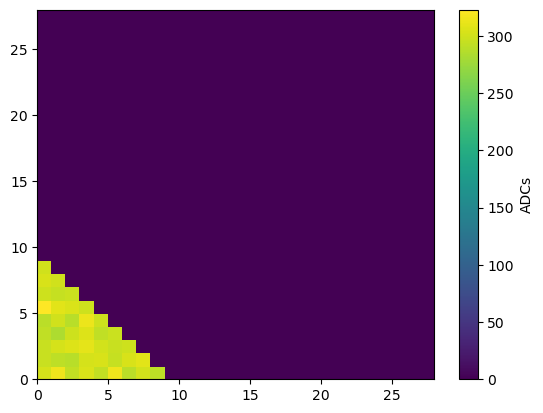

event: 101, index: 45, chkovs: 0


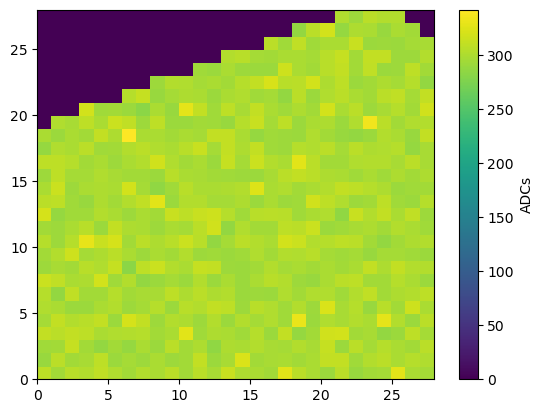

event: 101, index: 43, chkovs: 0


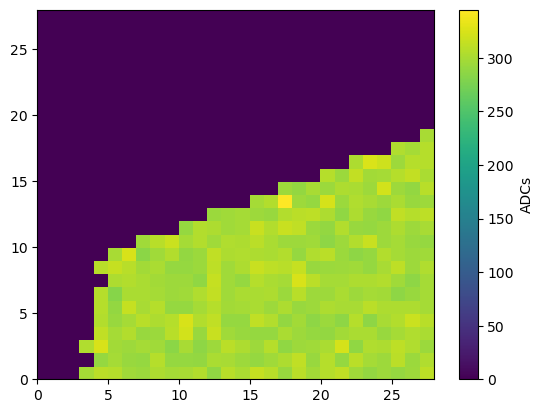

event: 101, index: 42, chkovs: 0


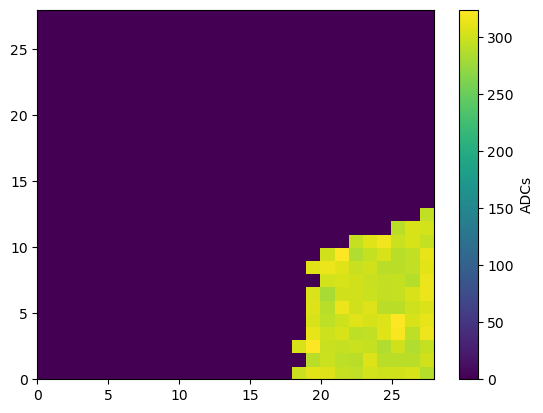

event: 101, index: 38, chkovs: 0


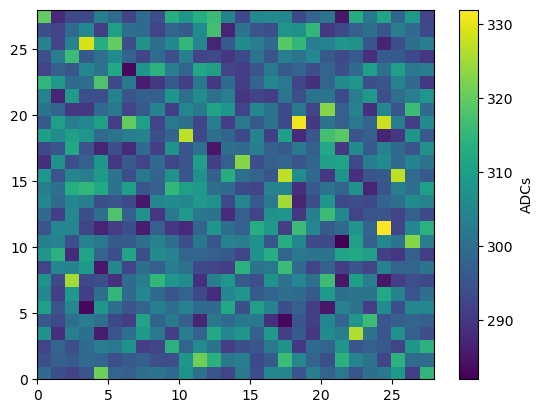

event: 101, index: 37, chkovs: 0


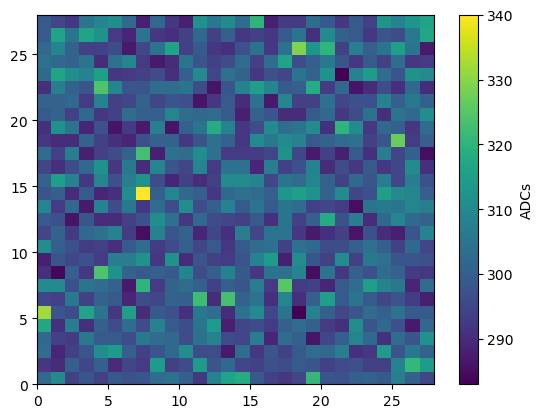

event: 101, index: 36, chkovs: 0


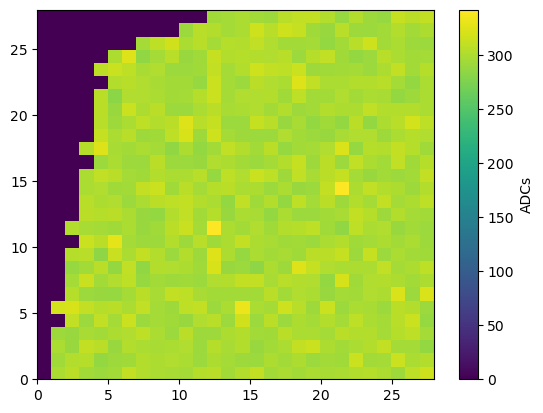

event: 101, index: 35, chkovs: 0


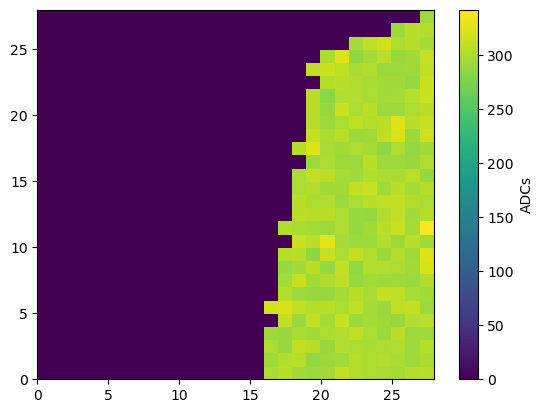

event: 101, index: 28, chkovs: 0


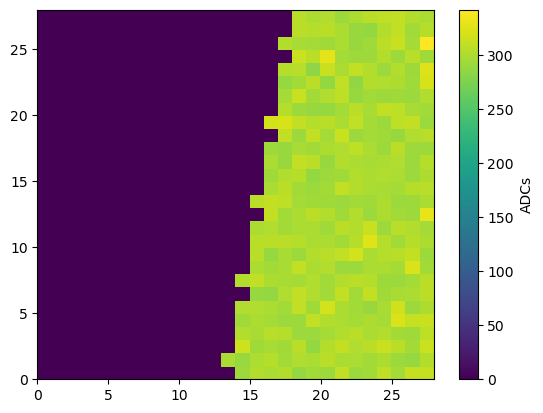

event: 101, index: 20, chkovs: 0


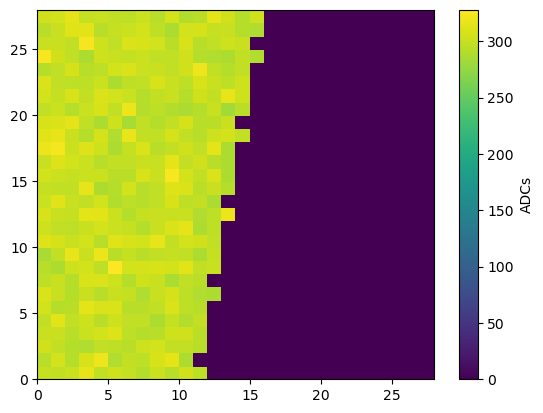

event: 101, index: 13, chkovs: 0


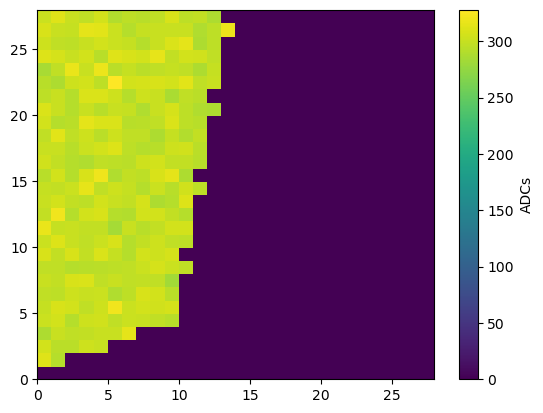

event: 101, index: 6, chkovs: 0


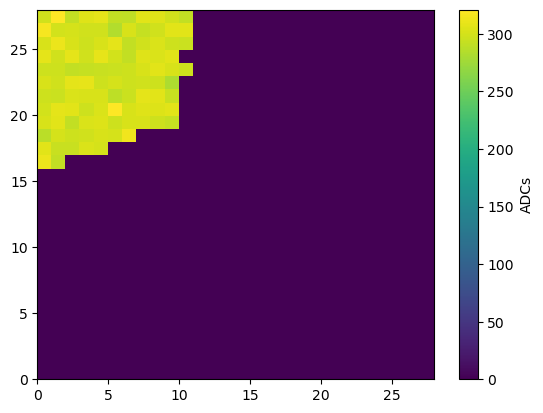

event: 101, index: 3, chkovs: 0


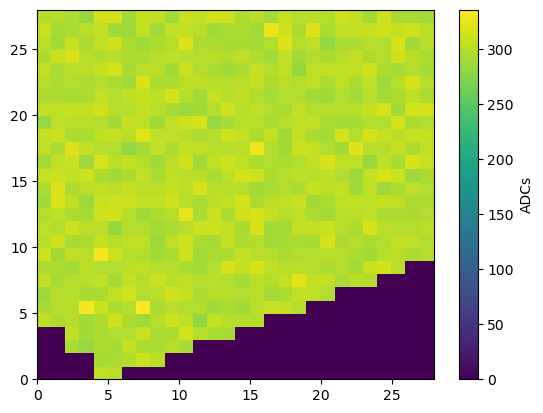

event: 101, index: 16, chkovs: 53


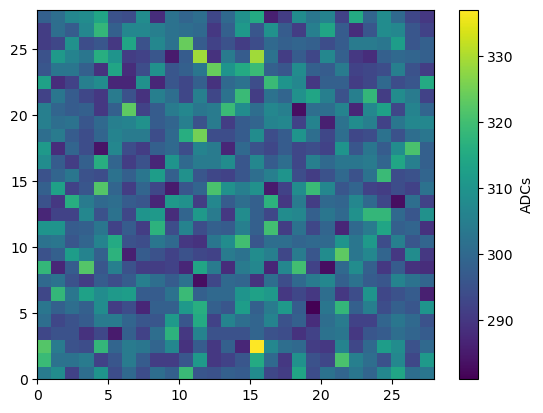

event: 101, index: 15, chkovs: 59


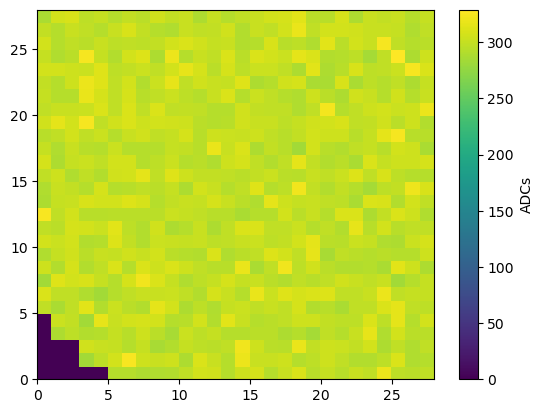

event: 101, index: 44, chkovs: 0


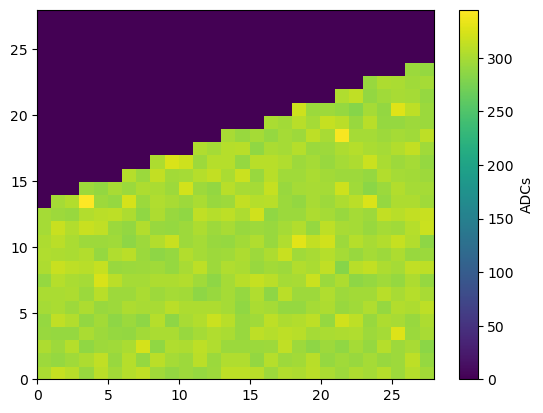

event: 101, index: 12, chkovs: 4


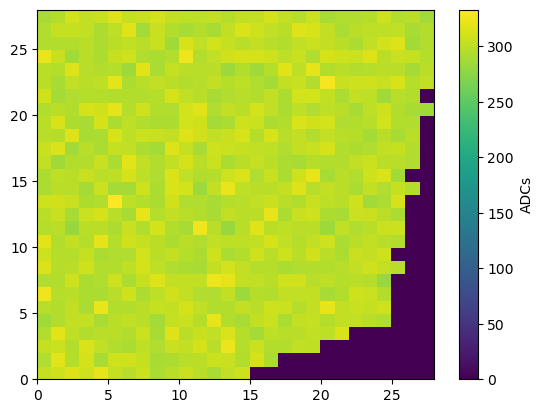

event: 101, index: 14, chkovs: 25


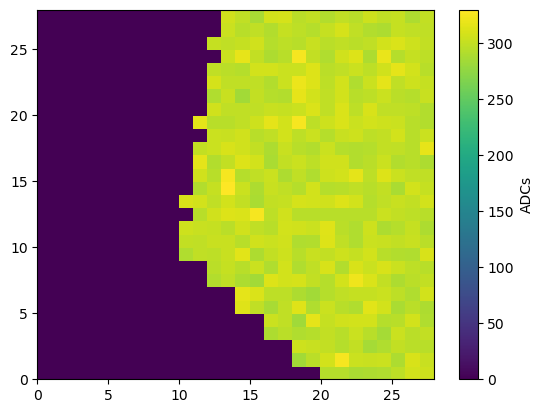

event: 101, index: 0, chkovs: 9


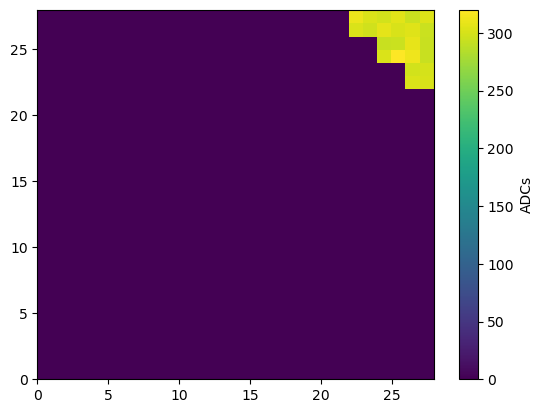

event: 101, index: 1, chkovs: 14


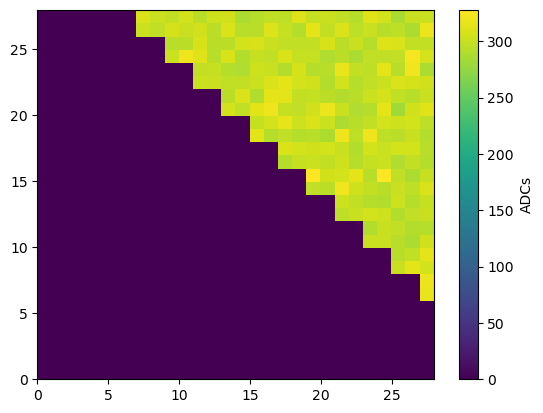

event: 101, index: 2, chkovs: 5


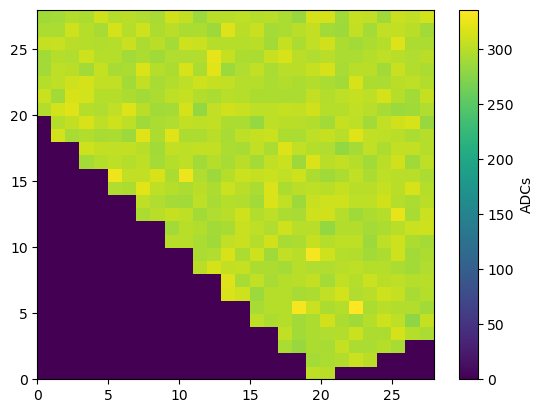

event: 101, index: 4, chkovs: 3


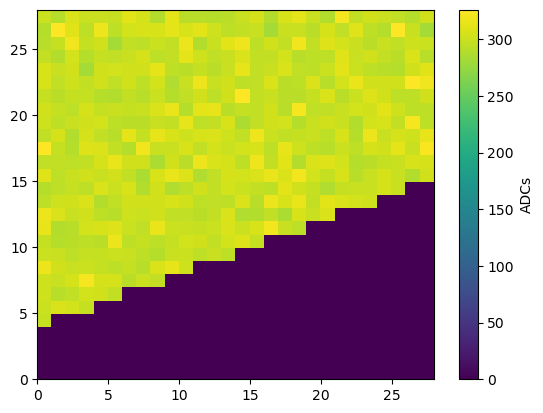

event: 101, index: 7, chkovs: 30


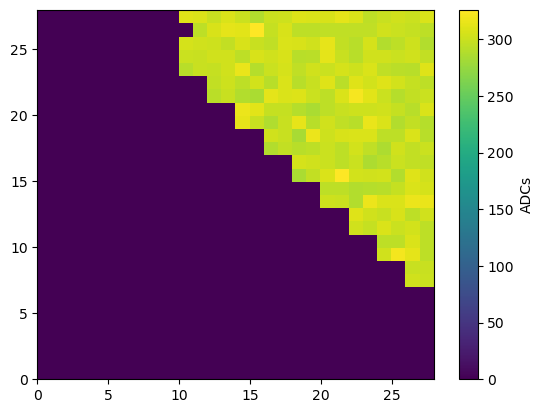

event: 101, index: 8, chkovs: 51


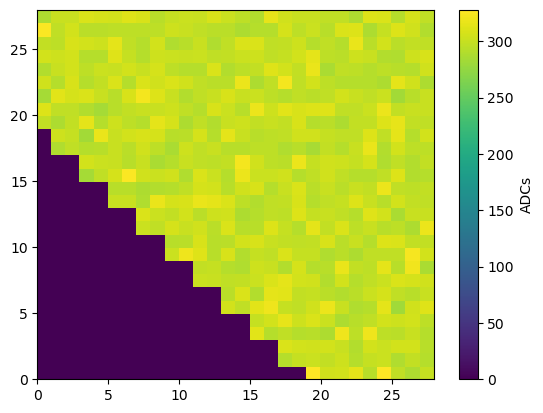

event: 101, index: 9, chkovs: 24


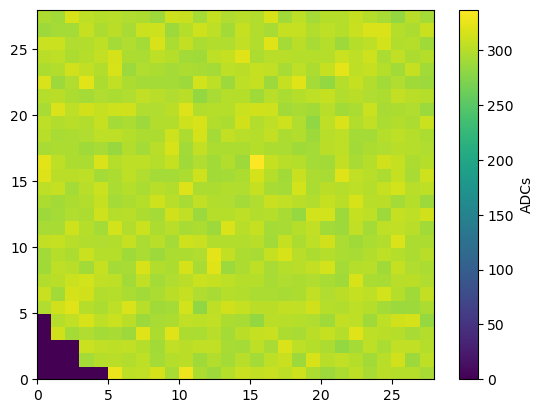

event: 101, index: 10, chkovs: 8


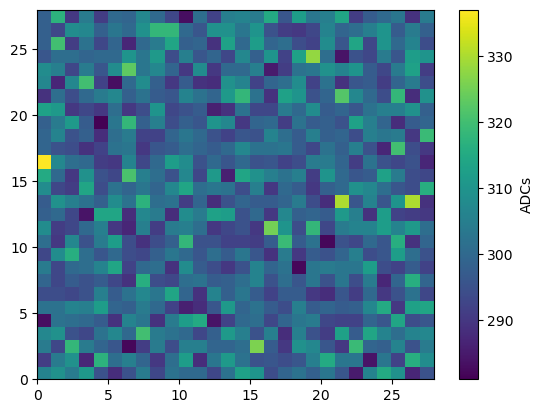

event: 101, index: 11, chkovs: 7


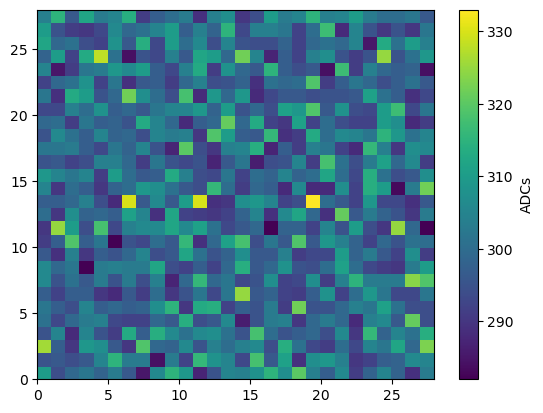

event: 101, index: 5, chkovs: 3


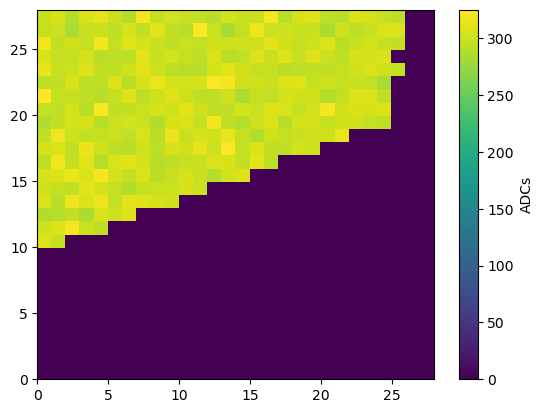

In [18]:
batch = reader.generate_mono_batch(batch_indices=[0,1,2,3])

waveform = batch['patch_waveform'][:28]
for i in range(28):

    plt.figure()
    print(f"event: {batch["event_id"][i]}, index: {batch['patch_index'][i]}, chkovs: {batch['cherenkov_pe'][i]}")
    plt.pcolor(waveform[i][:,:,3],cmap='viridis')
    plt.colorbar(label="ADCs")
    plt.show()
    plt.close()

# Verify the data 

In [19]:
source = EventSource("/gamma3/users/jbuces/software/mc_data/reduced/NSB/corsika_run4.dl1b.h5")
# event.simulation.tel[1].true_image.shape

Table /r1/event/telescope/tel_001 is missing column first_cell_id for field first_cell_id of container <class 'ctapipe.containers.R1CameraContainer'>. It will be skipped.
Table /r1/event/telescope/tel_001 is missing column module_hires_local_clock_counter for field module_hires_local_clock_counter of container <class 'ctapipe.containers.R1CameraContainer'>. It will be skipped.
Table /r1/event/telescope/tel_001 is missing column pedestal_intensity for field pedestal_intensity of container <class 'ctapipe.containers.R1CameraContainer'>. It will be skipped.
Table /r1/event/telescope/tel_001 is missing column calibration_monitoring_id for field calibration_monitoring_id of container <class 'ctapipe.containers.R1CameraContainer'>. It will be skipped.


Event index: 100
True cherenkov p.e.: 0


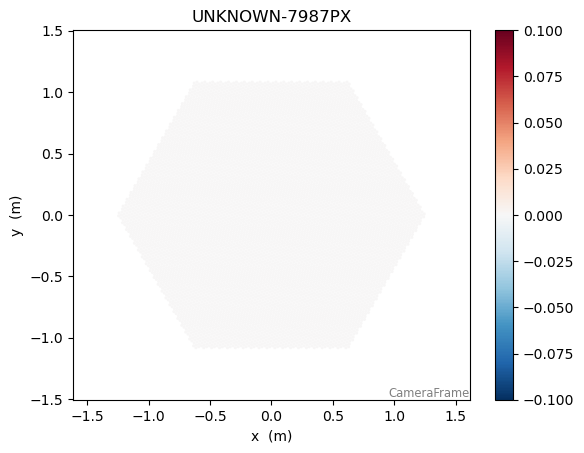

Event index: 101
True cherenkov p.e.: 183


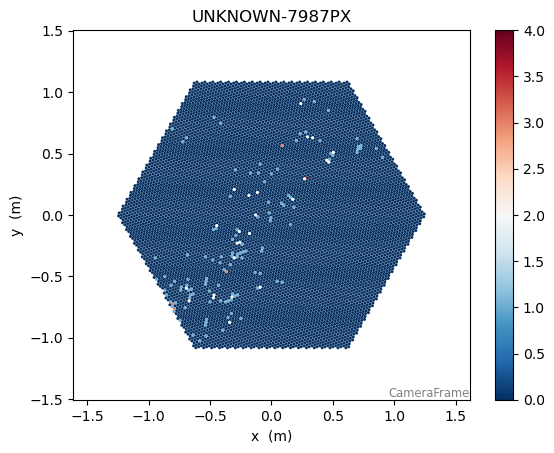

Event index: 102
True cherenkov p.e.: 1


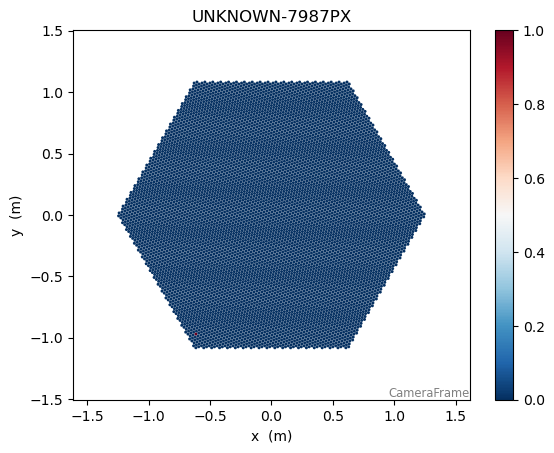

Event index: 103
True cherenkov p.e.: 12


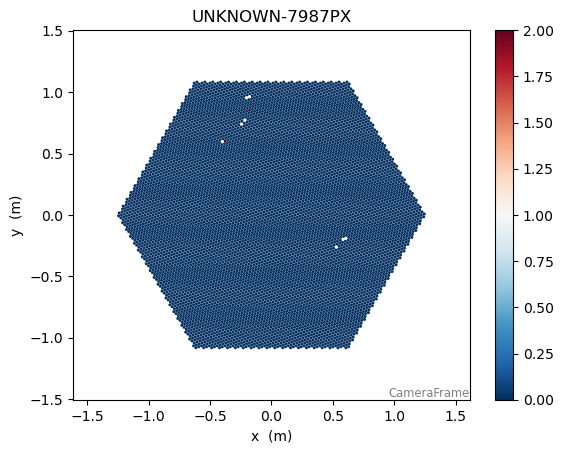

Event index: 104
True cherenkov p.e.: 0


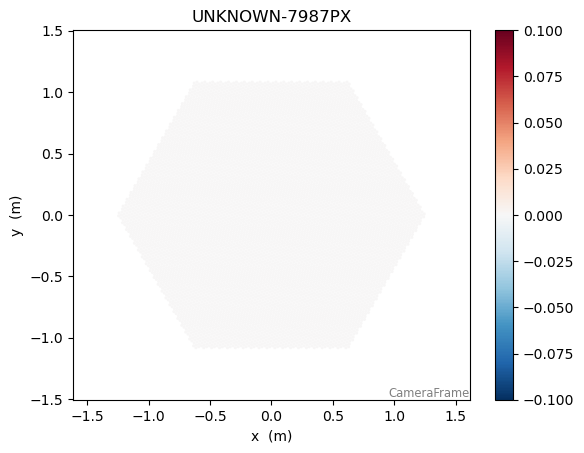

Event index: 105
True cherenkov p.e.: 67


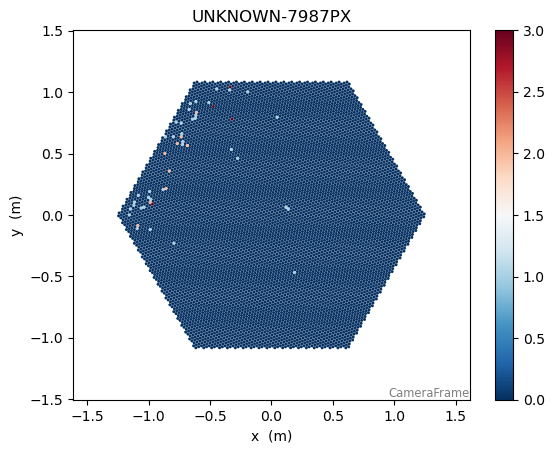

Event index: 106
True cherenkov p.e.: 0


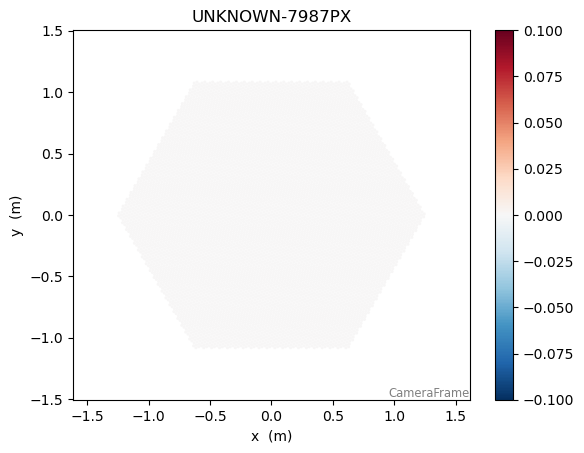

Event index: 107
True cherenkov p.e.: 0


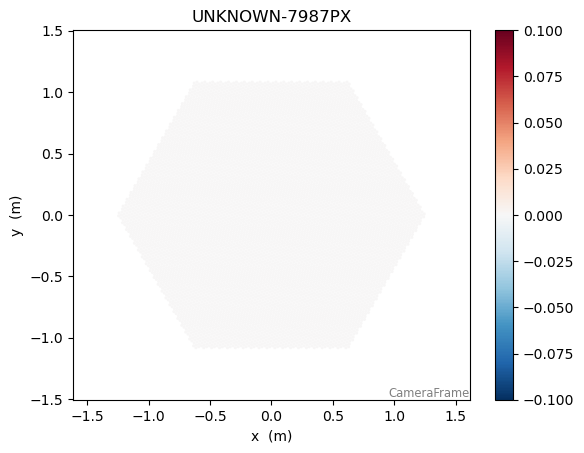

Event index: 108
True cherenkov p.e.: 0


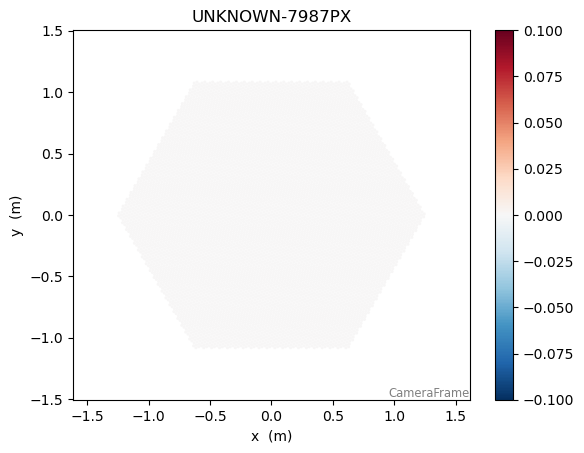

Event index: 109
True cherenkov p.e.: 0


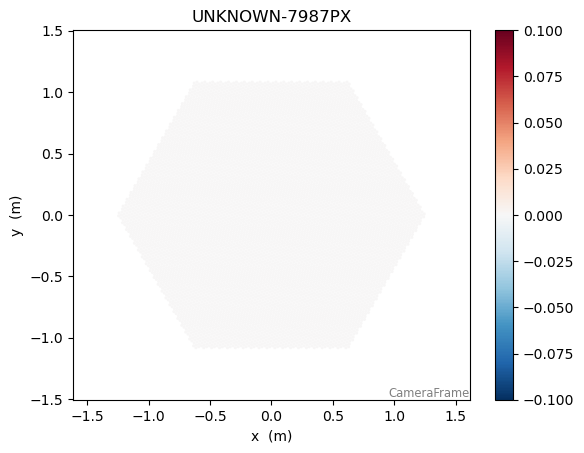

In [20]:
camgeo = source.subarray.tel[1].camera.geometry
for event in source:
    if event.count < 10:
        print(f"Event index: {event.index.event_id}")
        print(f"True cherenkov p.e.: {event.simulation.tel[1].true_image_sum}")
        disp = CameraDisplay(source.subarray.tel[1].camera.geometry)
        #disp.image = event.dl1.tel[1].image
        disp.image = event.simulation.tel[1].true_image
        disp.cmap = plt.cm.RdBu_r
        disp.add_colorbar()
        plt.show()
    else: break

In [21]:
for event in source:

        print(distance(event))

Table /r1/event/telescope/tel_001 is missing column first_cell_id for field first_cell_id of container <class 'ctapipe.containers.R1CameraContainer'>. It will be skipped.
Table /r1/event/telescope/tel_001 is missing column module_hires_local_clock_counter for field module_hires_local_clock_counter of container <class 'ctapipe.containers.R1CameraContainer'>. It will be skipped.
Table /r1/event/telescope/tel_001 is missing column pedestal_intensity for field pedestal_intensity of container <class 'ctapipe.containers.R1CameraContainer'>. It will be skipped.
Table /r1/event/telescope/tel_001 is missing column calibration_monitoring_id for field calibration_monitoring_id of container <class 'ctapipe.containers.R1CameraContainer'>. It will be skipped.


NameError: name 'distance' is not defined

In [ ]:
chkov = []
for event in source:
    chkov.append(event.simulation.tel[1].true_image_sum)

plt.hist(chkov, bins=50, edgecolor="black")
plt.xlabel("Detected Cherenkov p.e.")
plt.ylabel("Counts")
plt.title("Cherenkov p.e.")
plt.show()

In [ ]:
event.simulation.shower.keys()
event.simulation.shower.core_x

In [ ]:

def distance(event):
    x = event.simulation.shower.core_x
    y = event.simulation.shower.core_y
    d = np.sqrt(x**2+y**2)
    return d
    

In [ ]:
far = 0
near = 0
distances = []
for event in source:
    d = distance(event).to_value()
    if d >= 300:
        far+=1
    else:
        near+=1
    distances.append(d)

print(f"{far} events further than 300 m")
print(f"{near} events nearer than 300 m")

plt.hist(distances, bins=50, edgecolor="black")
plt.xlabel("Distance (m)")
plt.ylabel("Frequency")
plt.title("Histogram of Distances")
plt.show()